In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lee el archivo CSV
df = pd.read_csv(r'C:\Users\NayelyC\Desktop\Universidad\AnaliticaPredictiva\Semana4\Tarea4.2\Walmart.csv')

# Muestra las primeras filas del DataFrame
print(df.head(10))

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#Renombramos las columanas
df.rename({'Store':'tienda', 'Weekly_Sales': 'ventas_semanales', 'Holiday_Flag':'semana_festiva',
           'Temperature': 'temperatura', 'Fuel_Price':'precio_combustible', 'CPI':'indice_precios_c',
           'Unemployment':'tasa_desempleo'}, axis=1, inplace=True)

In [5]:
df.describe()

,tienda,ventas_semanales,semana_festiva,temperatura,precio_combustible,indice_precios_c,tasa_desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Crear un diccionario para almacenar los resultados
missing_data_info = {}

# Bucle para analizar cada columna
for column in df.columns:
    missing_count = df[column].isna().sum()  # Contador valores perdidos en la columna
    missing_data_info[column] = missing_count

# Mostrar los resultados
for column, missing_count in missing_data_info.items():
    if missing_count > 0:
        print(f'La columna {column} tiene {missing_count} datos perdidos.')
    else:
        print(f'La columna {column} no tiene datos perdidos.')

La columna tienda no tiene datos perdidos.
La columna Date no tiene datos perdidos.
La columna ventas_semanales no tiene datos perdidos.
La columna semana_festiva no tiene datos perdidos.
La columna temperatura no tiene datos perdidos.
La columna precio_combustible no tiene datos perdidos.
La columna indice_precios_c no tiene datos perdidos.
La columna tasa_desempleo no tiene datos perdidos.


In [7]:
#Convertimos nuestra columna semana_festiva a cualitativa
df['semana_festiva'] = pd.Categorical(df['semana_festiva'], categories=[0, 1], ordered=False)

In [8]:
#Le damos nombres descriptivos
df['semana_festiva'] = df['semana_festiva'].cat.rename_categories({0: 'No Festiva', 1: 'Festiva'})
# Convierte la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Verifica la conversión
print(df.dtypes)
print(df)

tienda                         int64
Date                  datetime64[ns]
ventas_semanales             float64
semana_festiva              category
temperatura                  float64
precio_combustible           float64
indice_precios_c             float64
tasa_desempleo               float64
dtype: object
      tienda       Date  ventas_semanales semana_festiva  temperatura  \
0          1 2010-02-05        1643690.90     No Festiva        42.31   
1          1 2010-02-12        1641957.44        Festiva        38.51   
2          1 2010-02-19        1611968.17     No Festiva        39.93   
3          1 2010-02-26        1409727.59     No Festiva        46.63   
4          1 2010-03-05        1554806.68     No Festiva        46.50   
...      ...        ...               ...            ...          ...   
6430      45 2012-09-28         713173.95     No Festiva        64.88   
6431      45 2012-10-05         733455.07     No Festiva        64.89   
6432      45 2012-10-12         7

In [9]:
# Identificar las columnas cuantitativas
quantitative_columns = df.select_dtypes(include=['float64', 'int64'])

# Crear un diccionario para almacenar los resultados de los outliers
outliers_info = {}

# Bucle para analizar cada columna cuantitativa
for column in quantitative_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_info[column] = outliers_count

# Mostrar los resultados
for column, outliers_count in outliers_info.items():
    print(f'La columna {column} tiene {outliers_count} outliers.')

La columna tienda tiene 0 outliers.
La columna ventas_semanales tiene 34 outliers.
La columna temperatura tiene 3 outliers.
La columna precio_combustible tiene 0 outliers.
La columna indice_precios_c tiene 0 outliers.
La columna tasa_desempleo tiene 481 outliers.


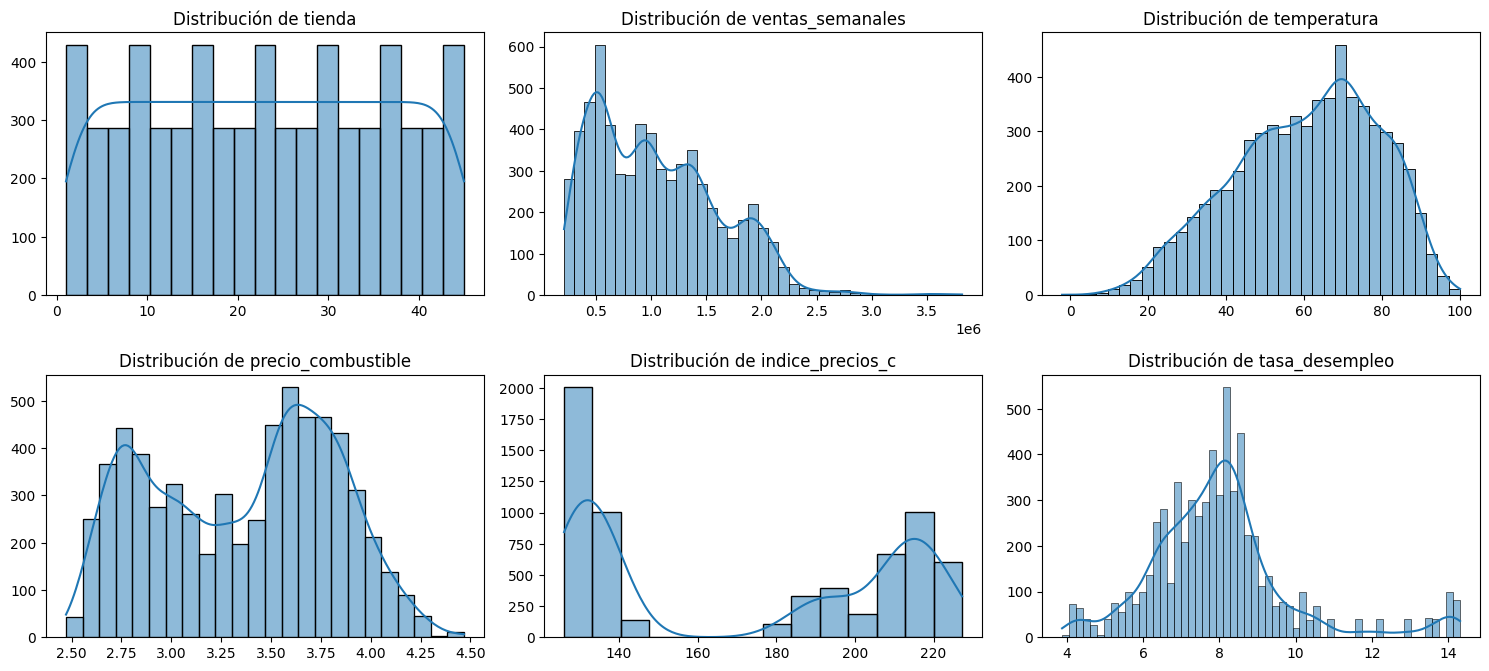

In [10]:
# Configura el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Itera sobre cada columna numérica y crea un histograma
for i, col in enumerate(quantitative_columns.columns):
    plt.subplot(len(quantitative_columns.columns) // 3 + 1, 3, i + 1)
    sns.histplot(quantitative_columns[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('')

# Ajusta el layout
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [11]:
#Matriz de correlación entre los datos numéricos
quantitative_columns.corr().style.background_gradient(cmap='coolwarm')

,tienda,ventas_semanales,temperatura,precio_combustible,indice_precios_c,tasa_desempleo
tienda,1.000000,-0.335332,-0.022659,0.060023,-0.209492,0.223531
ventas_semanales,-0.335332,1.000000,-0.063810,0.009464,-0.072634,-0.106176
temperatura,-0.022659,-0.063810,1.000000,0.144982,0.176888,0.101158
precio_combustible,0.060023,0.009464,0.144982,1.000000,-0.170642,-0.034684
indice_precios_c,-0.209492,-0.072634,0.176888,-0.170642,1.000000,-0.302020
tasa_desempleo,0.223531,-0.106176,0.101158,-0.034684,-0.302020,1.000000


In [12]:
#Recodificamos nuestra variable categórica: semana_festiva
# Convertir la columna categórica 'semana_festiva' en variables dummy
df = pd.get_dummies(df, columns=['semana_festiva'], drop_first=True)

# Verificar el resultado
print(df.head(5))

   tienda       Date  ventas_semanales  temperatura  precio_combustible  \
0       1 2010-02-05        1643690.90        42.31               2.572   
1       1 2010-02-12        1641957.44        38.51               2.548   
2       1 2010-02-19        1611968.17        39.93               2.514   
3       1 2010-02-26        1409727.59        46.63               2.561   
4       1 2010-03-05        1554806.68        46.50               2.625   

   indice_precios_c  tasa_desempleo  semana_festiva_Festiva  
0        211.096358           8.106                   False  
1        211.242170           8.106                    True  
2        211.289143           8.106                   False  
3        211.319643           8.106                   False  
4        211.350143           8.106                   False  


In [13]:
df=df.set_index(['Date', 'tienda'])

In [14]:
fecha = df.index.get_level_values('Date').to_list()
df['fecha'] = pd.Categorical(fecha)

In [15]:
df

,,ventas_semanales,temperatura,precio_combustible,indice_precios_c,tasa_desempleo,semana_festiva_Festiva,fecha
Date,tienda,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05
2010-02-12,1,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05
...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,64.88,3.997,192.013558,8.684,False,2012-09-28
2012-10-05,45,733455.07,64.89,3.985,192.170412,8.667,False,2012-10-05
2012-10-12,45,734464.36,54.47,4.000,192.327265,8.667,False,2012-10-12


In [16]:
df['fecha']

Date        tienda
2010-02-05  1        2010-02-05
2010-02-12  1        2010-02-12
2010-02-19  1        2010-02-19
2010-02-26  1        2010-02-26
2010-03-05  1        2010-03-05
                        ...    
2012-09-28  45       2012-09-28
2012-10-05  45       2012-10-05
2012-10-12  45       2012-10-12
2012-10-19  45       2012-10-19
2012-10-26  45       2012-10-26
Name: fecha, Length: 6435, dtype: category
Categories (143, datetime64[ns]): [2010-02-05, 2010-02-12, 2010-02-19, 2010-02-26, ..., 2012-10-05, 2012-10-12, 2012-10-19, 2012-10-26]

In [18]:
#Importamos librerías para realizar Pooled OLS
from linearmodels import PooledOLS
import statsmodels.api as sm

In [19]:
#Definimos nuestra variable dependiente
X = df[['semana_festiva_Festiva', 'temperatura', 'precio_combustible', 'indice_precios_c', 'tasa_desempleo']]
X = sm.add_constant(X)
print(X.head())

y = df.ventas_semanales

                   const  semana_festiva_Festiva  temperatura  \
Date       tienda                                               
2010-02-05 1         1.0                   False        42.31   
2010-02-12 1         1.0                    True        38.51   
2010-02-19 1         1.0                   False        39.93   
2010-02-26 1         1.0                   False        46.63   
2010-03-05 1         1.0                   False        46.50   

                   precio_combustible  indice_precios_c  tasa_desempleo  
Date       tienda                                                        
2010-02-05 1                    2.572        211.096358           8.106  
2010-02-12 1                    2.548        211.242170           8.106  
2010-02-19 1                    2.514        211.289143           8.106  
2010-02-26 1                    2.561        211.319643           8.106  
2010-03-05 1                    2.625        211.350143           8.106  


In [20]:
print(y.head())

Date        tienda
2010-02-05  1         1643690.90
2010-02-12  1         1641957.44
2010-02-19  1         1611968.17
2010-02-26  1         1409727.59
2010-03-05  1         1554806.68
Name: ventas_semanales, dtype: float64


In [22]:
#Importamos librerías para realizar Pooled OLS
from linearmodels import PooledOLS
import statsmodels.api as sm

In [23]:
#Definimos nuestra variable dependiente
X = df[['semana_festiva_Festiva', 'temperatura', 'precio_combustible', 'indice_precios_c', 'tasa_desempleo']]
X = sm.add_constant(X)
print(X.head())

y = df.ventas_semanales

                   const  semana_festiva_Festiva  temperatura  \
Date       tienda                                               
2010-02-05 1         1.0                   False        42.31   
2010-02-12 1         1.0                    True        38.51   
2010-02-19 1         1.0                   False        39.93   
2010-02-26 1         1.0                   False        46.63   
2010-03-05 1         1.0                   False        46.50   

                   precio_combustible  indice_precios_c  tasa_desempleo  
Date       tienda                                                        
2010-02-05 1                    2.572        211.096358           8.106  
2010-02-12 1                    2.548        211.242170           8.106  
2010-02-19 1                    2.514        211.289143           8.106  
2010-02-26 1                    2.561        211.319643           8.106  
2010-03-05 1                    2.625        211.350143           8.106  


In [24]:
print(y.head())

Date        tienda
2010-02-05  1         1643690.90
2010-02-12  1         1641957.44
2010-02-19  1         1611968.17
2010-02-26  1         1409727.59
2010-03-05  1         1554806.68
Name: ventas_semanales, dtype: float64


In [25]:
#modelo sin entrenamiento

In [26]:
modelo = PooledOLS(y, X)
resultados_pooled_OLS1 = modelo.fit(cov_type='clustered', cluster_entity=True)

In [27]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS11 = resultados_pooled_OLS1.predict().fitted_values
residuos_pooled_OLS11 = resultados_pooled_OLS1.resids

In [28]:
print(resultados_pooled_OLS1)

                          PooledOLS Estimation Summary                          
Dep. Variable:       ventas_semanales   R-squared:                        0.0254
Estimator:                  PooledOLS   R-squared (Between):              0.0386
No. Observations:                6435   R-squared (Within):               0.0248
Date:                Wed, Aug 07 2024   R-squared (Overall):              0.0254
Time:                        14:07:51   Log-likelihood                -9.427e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      33.570
Entities:                         143   P-value                           0.0000
Avg Obs:                       45.000   Distribution:                  F(5,6429)
Min Obs:                       45.000                                           
Max Obs:                       45.000   F-statistic (robust):             729.27
                            

In [29]:
#Eliminamos las variables que no son significativas: Definimos nuestra variable dependiente
X = df[['indice_precios_c', 'tasa_desempleo']]
X = sm.add_constant(X)
print(X.head())

y = df.ventas_semanales


                   const  indice_precios_c  tasa_desempleo
Date       tienda                                         
2010-02-05 1         1.0        211.096358           8.106
2010-02-12 1         1.0        211.242170           8.106
2010-02-19 1         1.0        211.289143           8.106
2010-02-26 1         1.0        211.319643           8.106
2010-03-05 1         1.0        211.350143           8.106


In [30]:
modelo = PooledOLS(y, X)
resultados_pooled_OLS1 = modelo.fit(cov_type='clustered', cluster_entity=True)

In [31]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS11 = resultados_pooled_OLS1.predict().fitted_values
residuos_pooled_OLS11 = resultados_pooled_OLS1.resids

In [32]:
print(resultados_pooled_OLS1)

                          PooledOLS Estimation Summary                          
Dep. Variable:       ventas_semanales   R-squared:                        0.0233
Estimator:                  PooledOLS   R-squared (Between):             -0.0197
No. Observations:                6435   R-squared (Within):               0.0254
Date:                Wed, Aug 07 2024   R-squared (Overall):              0.0233
Time:                        14:07:51   Log-likelihood                -9.428e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      76.842
Entities:                         143   P-value                           0.0000
Avg Obs:                       45.000   Distribution:                  F(2,6432)
Min Obs:                       45.000                                           
Max Obs:                       45.000   F-statistic (robust):             944.44
                            

In [33]:
#modelo con entrenamiento

In [34]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Creamos modelo Pooled OLS
modelo1 = PooledOLS(y_train, X_train)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [36]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [37]:
print(resultados_pooled_OLS.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:       ventas_semanales   R-squared:                        0.0249
Estimator:                  PooledOLS   R-squared (Between):             -0.0056
No. Observations:                5148   R-squared (Within):               0.0266
Date:                Wed, Aug 07 2024   R-squared (Overall):              0.0249
Time:                        14:07:52   Log-likelihood                -7.541e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      65.659
Entities:                         143   P-value                           0.0000
Avg Obs:                       36.000   Distribution:                  F(2,5145)
Min Obs:                       28.000                                           
Max Obs:                       42.000   F-statistic (robust):             214.25
                            

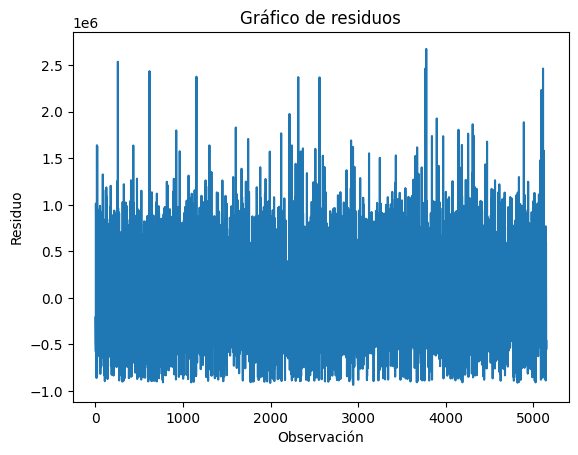

In [38]:
#VERIFICACIÓN DE SUPUESTOS
# 1. Homocedasticidad
#Graficar los residuos
plt.plot(residuos_pooled_OLS.tolist() )
plt.xlabel('Observación')
plt.ylabel('Residuo')
plt.title('Gráfico de residuos')
plt.show()

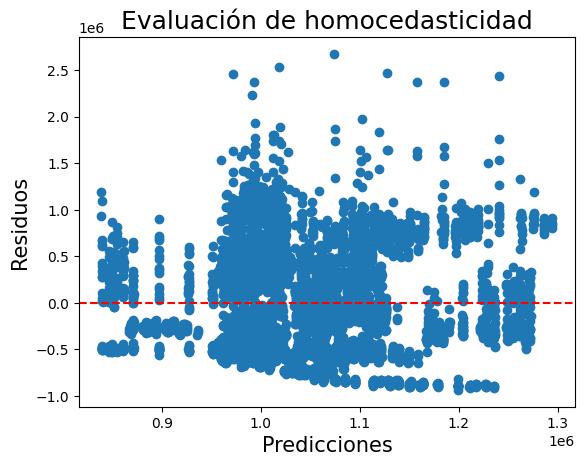

In [39]:
#Medimos homocedasticidad: nube de puntos
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

In [40]:
#Importamos librería para medir homocedasticidad por medio del test breusch pagan
from statsmodels.stats.diagnostic import het_breuschpagan

In [41]:
from statsmodels.stats.stattools import durbin_watson

In [42]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['fecha'], axis = 1)
X_ = sm.tools.tools.add_constant(df['tasa_desempleo'])

In [43]:
residuos_pooled_OLS

Date        tienda
2010-09-17  8        -210947.678669
2011-03-11  7        -415643.406643
2010-11-12  42       -486421.181948
2011-08-26  15       -506599.262145
2011-08-19  42       -576952.221208
                          ...      
2011-02-18  27        600003.028160
2010-12-03  37       -451178.084570
2011-08-05  37       -455348.847210
2011-12-30  38       -554317.000323
2010-02-19  7        -463349.041881
Name: residual, Length: 5148, dtype: float64

In [44]:
#Test de Breusch Pagan
# Breusch-Pagan test
exog = sm.add_constant(X_train)
bp_test = het_breuschpagan(resultados_pooled_OLS.resids, exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': np.float64(59.81311010869209), 'LM-Test p-value': np.float64(1.0274203586726246e-13), 'F-Statistic': np.float64(30.24048233375664), 'F-Test p-value': np.float64(8.776441259394817e-14)}


In [45]:
#2. NO HAYA AUTO-CORRELACIÓN
#Importamos librería para verificar que no haya auto-correlación por medio del test de durbin watson
from statsmodels.stats.stattools import durbin_watson

In [46]:
pooled_OLS_df

,,ventas_semanales,temperatura,precio_combustible,indice_precios_c,tasa_desempleo,semana_festiva_Festiva,residual
Date,tienda,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False,669103.153860
2010-02-12,1,1641957.44,38.51,2.548,211.242170,8.106,True,667611.409978
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False,637700.008648
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False,435509.989383
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False,580639.640117
...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,64.88,3.997,192.013558,8.684,False,-267443.688576
2012-10-05,45,733455.07,64.89,3.985,192.170412,8.667,False,NaN
2012-10-12,45,734464.36,54.47,4.000,192.327265,8.667,False,-246386.301500


In [47]:
pooled_OLS_df = pooled_OLS_df.dropna()

In [48]:
pooled_OLS_df

,,ventas_semanales,temperatura,precio_combustible,indice_precios_c,tasa_desempleo,semana_festiva_Festiva,residual
Date,tienda,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False,669103.153860
2010-02-12,1,1641957.44,38.51,2.548,211.242170,8.106,True,667611.409978
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False,637700.008648
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False,435509.989383
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False,580639.640117
...,...,...,...,...,...,...,...,...
2012-09-14,45,702238.27,67.87,3.948,191.699850,8.684,False,-278899.410929
2012-09-28,45,713173.95,64.88,3.997,192.013558,8.684,False,-267443.688576
2012-10-12,45,734464.36,54.47,4.000,192.327265,8.667,False,-246386.301500


In [49]:
pooled_OLS_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5148 entries, (Timestamp('2010-02-05 00:00:00'), np.int64(1)) to (Timestamp('2012-10-26 00:00:00'), np.int64(45))
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ventas_semanales        5148 non-null   float64
 1   temperatura             5148 non-null   float64
 2   precio_combustible      5148 non-null   float64
 3   indice_precios_c        5148 non-null   float64
 4   tasa_desempleo          5148 non-null   float64
 5   semana_festiva_Festiva  5148 non-null   bool   
 6   residual                5148 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 268.1 KB


In [50]:
# Verificar los residuos
print(pooled_OLS_df['residual'].describe())


count    5.148000e+03
mean    -1.736732e-09
std      5.564845e+05
min     -9.348242e+05
25%     -4.785316e+05
50%     -1.147596e+05
75%      3.919778e+05
max      2.674769e+06
Name: residual, dtype: float64


In [51]:
print(pooled_OLS_df['residual'].dtype)

float64


In [52]:
print(pooled_OLS_df['residual'].isna().sum())

0


In [53]:
pooled_OLS_df['residual']

Date        tienda
2010-02-05  1         669103.153860
2010-02-12  1         667611.409978
2010-02-19  1         637700.008648
2010-02-26  1         435509.989383
2010-03-05  1         580639.640117
                          ...      
2012-09-14  45       -278899.410929
2012-09-28  45       -267443.688576
2012-10-12  45       -246386.301500
2012-10-19  45       -262719.182243
2012-10-26  45       -220599.678180
Name: residual, Length: 5148, dtype: float64

In [54]:
pooled_OLS_df['residual'] = pooled_OLS_df['residual'].astype(float)

In [55]:
durbin_watson = durbin_watson(pooled_OLS_df['indice_precios_c'])
print(durbin_watson)

0.0009247053339359469


In [56]:
#modelos efectos fijos y_train, X_train

In [57]:
from linearmodels import PanelOLS

In [58]:
modelo_fe = PanelOLS(y_train, X_train, entity_effects = True )
resultados_fe = modelo_fe.fit()

In [59]:
print(resultados_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:       ventas_semanales   R-squared:                        0.0267
Estimator:                   PanelOLS   R-squared (Between):             -0.0069
No. Observations:                5148   R-squared (Within):               0.0267
Date:                Wed, Aug 07 2024   R-squared (Overall):              0.0249
Time:                        14:07:53   Log-likelihood                -7.527e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      68.502
Entities:                         143   P-value                           0.0000
Avg Obs:                       36.000   Distribution:                  F(2,5003)
Min Obs:                       28.000                                           
Max Obs:                       42.000   F-statistic (robust):             68.502
                            

In [60]:
#modelo efecto aleatorio y_train, X_train

In [61]:
from linearmodels import RandomEffects

In [62]:
modelo_re = RandomEffects(y_train, X_train)


In [63]:
resultados_re = modelo_re.fit()

In [64]:
print(resultados_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:       ventas_semanales   R-squared:                        0.0261
Estimator:              RandomEffects   R-squared (Between):             -0.0062
No. Observations:                5148   R-squared (Within):               0.0266
Date:                Wed, Aug 07 2024   R-squared (Overall):              0.0249
Time:                        14:07:53   Log-likelihood                -7.534e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      69.060
Entities:                         143   P-value                           0.0000
Avg Obs:                       36.000   Distribution:                  F(2,5145)
Min Obs:                       28.000                                           
Max Obs:                       42.000   F-statistic (robust):             67.991
                            

In [65]:
#test de hausman

In [66]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [67]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [68]:
hausman = hausman(resultados_fe, resultados_re)

In [69]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 1.3113360652725772
degrees of freedom: 3
p-Value:0.7264429917332984


In [70]:
# Predecir los valores del conjunto de prueba con el modelo seleccionado: efectos aleatorios
y_pred = resultados_re.predict(X_test)

In [71]:
y_pred

,,predictions
Date,tienda,
2010-03-12,18,1.056566e+06
2011-06-24,24,1.095498e+06
2011-10-28,2,9.939929e+05
2011-11-11,26,1.121243e+06
2010-03-19,36,9.559244e+05
...,...,...
2010-08-06,19,1.105006e+06
2010-05-28,45,9.867494e+05
2010-02-05,45,9.828399e+05


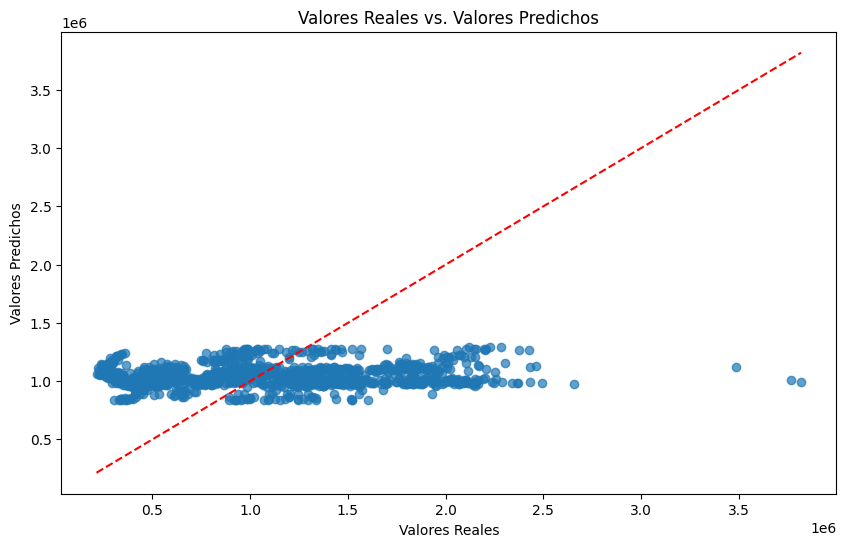

In [72]:
# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [73]:
# Obtener la importancia de las características
coeficientes = resultados_re.params

# Mostrar los coeficientes
print(coeficientes)

const               1.691130e+06
indice_precios_c   -1.661334e+03
tasa_desempleo     -4.516690e+04
Name: parameter, dtype: float64
